# 1. Import and Install Dependencies

In [1]:
#!pip install tensorflow==2.7.1 tensorflow-gpu==2.7.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

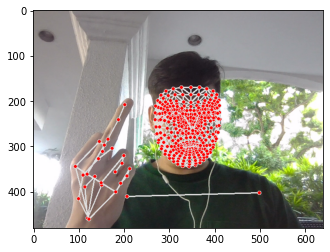

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
len(result_test)

1662

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.46360976,  0.55745411, -0.82151937, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hi', 'I am', 'From', 'Singapore', 'Paiseh', 'I', 'Cannot', 'Speak', 'But', 'Machine', 'Learning', 'Can', 'Help', 'Translate'])

# Thirty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [19]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'Hi': 0,
 'I am': 1,
 'From': 2,
 'Singapore': 3,
 'Paiseh': 4,
 'I': 5,
 'Cannot': 6,
 'Speak': 7,
 'But': 8,
 'Machine': 9,
 'Learning': 10,
 'Can': 11,
 'Help': 12,
 'Translate': 13}

In [11]:
iterations = list(range(10,20))+list(range(30,50))

In [13]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [14]:
np.array(sequences).shape

(700, 30, 1662)

In [15]:
np.array(labels).shape

(700,)

In [16]:
X = np.array(sequences)

In [17]:
X.shape

(700, 30, 1662)

In [18]:
y = to_categorical(labels).astype(int)

In [19]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
y_test.shape

(140, 14)

# 7. Build and Train LSTM Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [13]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [14]:
model = Sequential() # changed activation to tanh
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [25]:
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)


model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['categorical_accuracy']) 

In [26]:
model_training_history = model.fit(X_train, y_train, epochs=300, batch_size = 32,
                                                     shuffle = True, validation_split = 0.2, 
                                                     callbacks = [early_stopping_callback])

Epoch 1/300
14/14 [==============================] - 89s 2s/step - loss: 2.6454 - categorical_accuracy: 0.0737 - val_loss: 2.6525 - val_categorical_accuracy: 0.0804
Epoch 2/300
14/14 [==============================] - 4s 294ms/step - loss: 2.6385 - categorical_accuracy: 0.0714 - val_loss: 2.6426 - val_categorical_accuracy: 0.0714
Epoch 3/300
14/14 [==============================] - 4s 298ms/step - loss: 2.6322 - categorical_accuracy: 0.0737 - val_loss: 2.6331 - val_categorical_accuracy: 0.0625
Epoch 4/300
14/14 [==============================] - 4s 328ms/step - loss: 2.6270 - categorical_accuracy: 0.0804 - val_loss: 2.6252 - val_categorical_accuracy: 0.0714
Epoch 5/300
14/14 [==============================] - 5s 335ms/step - loss: 2.6212 - categorical_accuracy: 0.1004 - val_loss: 2.6190 - val_categorical_accuracy: 0.1161
Epoch 6/300
14/14 [==============================] - 5s 339ms/step - loss: 2.6150 - categorical_accuracy: 0.1138 - val_loss: 2.6116 - val_categorical_accuracy: 0.1161


Epoch 50/300
14/14 [==============================] - 3s 232ms/step - loss: 2.0044 - categorical_accuracy: 0.3728 - val_loss: 1.9895 - val_categorical_accuracy: 0.3393
Epoch 51/300
14/14 [==============================] - 3s 240ms/step - loss: 1.9916 - categorical_accuracy: 0.3817 - val_loss: 1.9788 - val_categorical_accuracy: 0.3482
Epoch 52/300
14/14 [==============================] - 3s 230ms/step - loss: 1.9752 - categorical_accuracy: 0.3839 - val_loss: 1.9771 - val_categorical_accuracy: 0.3036
Epoch 53/300
14/14 [==============================] - 4s 257ms/step - loss: 1.9682 - categorical_accuracy: 0.3571 - val_loss: 2.0130 - val_categorical_accuracy: 0.3214
Epoch 54/300
14/14 [==============================] - 3s 224ms/step - loss: 1.9679 - categorical_accuracy: 0.3750 - val_loss: 1.9947 - val_categorical_accuracy: 0.2946
Epoch 55/300
14/14 [==============================] - 3s 239ms/step - loss: 1.9578 - categorical_accuracy: 0.3661 - val_loss: 1.9437 - val_categorical_accuracy:

14/14 [==============================] - 3s 222ms/step - loss: 1.1880 - categorical_accuracy: 0.7076 - val_loss: 1.2402 - val_categorical_accuracy: 0.6161
Epoch 147/300
14/14 [==============================] - 3s 217ms/step - loss: 1.1836 - categorical_accuracy: 0.7210 - val_loss: 1.2590 - val_categorical_accuracy: 0.6339
Epoch 148/300
14/14 [==============================] - 3s 226ms/step - loss: 1.1923 - categorical_accuracy: 0.7054 - val_loss: 1.2525 - val_categorical_accuracy: 0.6250
Epoch 149/300
14/14 [==============================] - 3s 208ms/step - loss: 1.1873 - categorical_accuracy: 0.7054 - val_loss: 1.2245 - val_categorical_accuracy: 0.6250
Epoch 150/300
14/14 [==============================] - 3s 217ms/step - loss: 1.1888 - categorical_accuracy: 0.7254 - val_loss: 1.2822 - val_categorical_accuracy: 0.5804
Epoch 151/300
14/14 [==============================] - 3s 251ms/step - loss: 1.1913 - categorical_accuracy: 0.6987 - val_loss: 1.2374 - val_categorical_accuracy: 0.6339


14/14 [==============================] - 3s 249ms/step - loss: 0.7701 - categorical_accuracy: 0.8862 - val_loss: 0.8410 - val_categorical_accuracy: 0.8393
Epoch 243/300
14/14 [==============================] - 4s 277ms/step - loss: 0.7708 - categorical_accuracy: 0.8772 - val_loss: 0.8406 - val_categorical_accuracy: 0.8304
Epoch 244/300
14/14 [==============================] - 4s 261ms/step - loss: 0.7578 - categorical_accuracy: 0.8772 - val_loss: 0.8475 - val_categorical_accuracy: 0.8125
Epoch 245/300
14/14 [==============================] - 3s 248ms/step - loss: 0.7454 - categorical_accuracy: 0.8862 - val_loss: 0.8477 - val_categorical_accuracy: 0.8304
Epoch 246/300
14/14 [==============================] - 3s 239ms/step - loss: 0.7391 - categorical_accuracy: 0.8951 - val_loss: 0.8518 - val_categorical_accuracy: 0.8393
Epoch 247/300
14/14 [==============================] - 3s 223ms/step - loss: 0.7443 - categorical_accuracy: 0.8817 - val_loss: 0.8349 - val_categorical_accuracy: 0.8482


In [71]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 64)            442112    
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 30, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 64)               

# 8. Make Predictions

In [72]:
res = model.predict(X_test)

In [73]:
actions[np.argmax(res[3])]

'Learning'

In [74]:
actions[np.argmax(y_test[3])]

'Learning'

# 9. Save Weights

In [91]:
# Evaluate the trained model.
model_evaluation_history = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 21ms/step - loss: 0.1595 - categorical_accuracy: 0.9929


In [76]:
import datetime as dt

# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

In [77]:
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'lstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

model.save(model_file_name)

In [82]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

In [83]:
# Visualize the training and validation loss metrices.
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

TypeError: 'History' object is not subscriptable

In [84]:
# Visualize the training and validation accuracy metrices.
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

TypeError: 'History' object is not subscriptable

In [217]:
del model

In [15]:
model.load_weights('lstmhand.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [25]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [26]:
yhat = model.predict(X_test)

In [27]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [28]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[77,  1],
        [ 0,  6]],

       [[77,  1],
        [ 0,  6]],

       [[75,  0],
        [ 0,  9]],

       [[79,  0],
        [ 0,  5]],

       [[76,  1],
        [ 1,  6]],

       [[74,  0],
        [ 1,  9]],

       [[80,  0],
        [ 0,  4]],

       [[75,  0],
        [ 1,  8]],

       [[78,  0],
        [ 0,  6]],

       [[79,  1],
        [ 0,  4]],

       [[80,  0],
        [ 1,  3]],

       [[77,  1],
        [ 0,  6]],

       [[78,  1],
        [ 0,  5]],

       [[81,  0],
        [ 2,  1]]], dtype=int64)

In [29]:
accuracy_score(ytrue, yhat)

0.9285714285714286

# 11. Test in Real Time

In [16]:
from scipy import stats

In [17]:
colors = [(245,117,16), (117,245,16), (16,117,245),(100,100,100)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

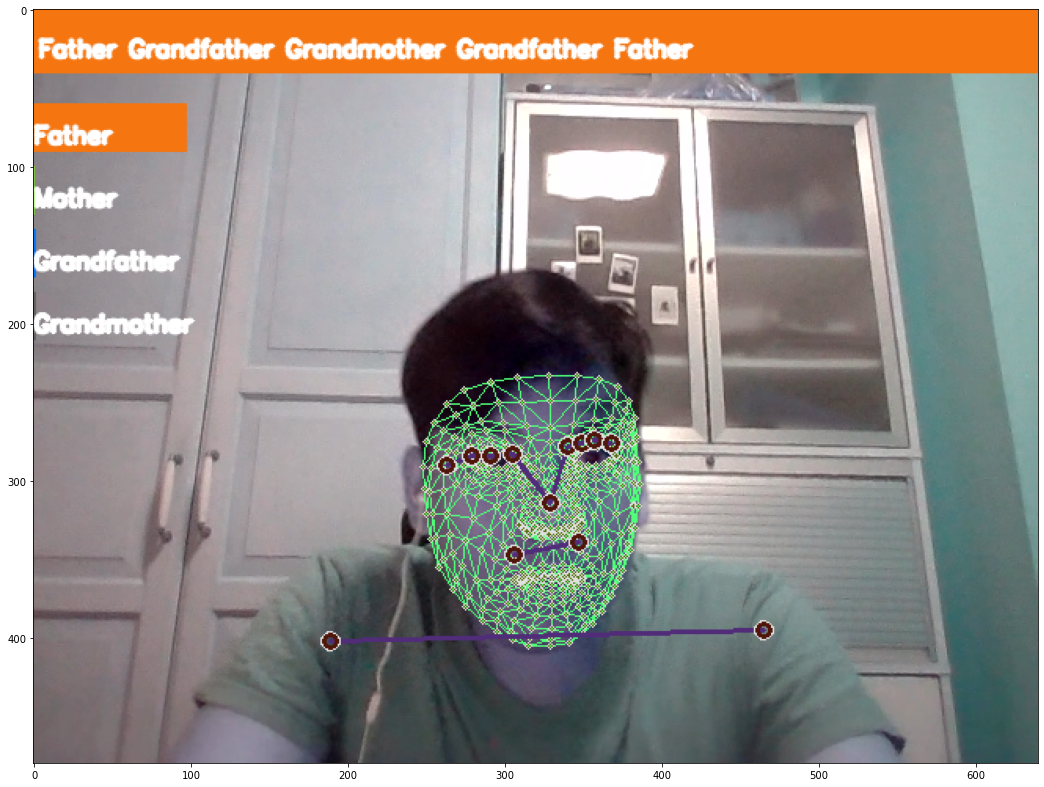

In [97]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [21]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints[-126:])
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [22]:
cap.release()
cv2.destroyAllWindows()

## For collecting frames for CNN

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Frame_Data') 
DATA_PATH2 = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['Hi'])

# Thirty videos worth of data
no_sequences = 10

start = 40

# Videos are going to be 30 frames in length
sequence_length = 30


In [26]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(start, start+no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            os.makedirs(os.path.join(DATA_PATH2, action, str(sequence)))
        except:
            pass

In [27]:
cap = cv2.VideoCapture(0)
    # NEW LOOP
    # Loop through actions
    
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start, start+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(-1,sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == -1: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    #cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                    #           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(3000)
                    continue
                else: 
                    #cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                    #           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)

                #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                resized = cv2.resize(frame, (256,256), interpolation = cv2.INTER_AREA)

                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, resized)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH2, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [18]:
cap.release()
cv2.destroyAllWindows()

In [5]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (256,256), interpolation = cv2.INTER_AREA)
cap.release()
cv2.destroyAllWindows()

In [12]:
resized.shape

(256, 256)

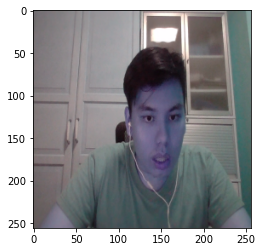

In [28]:
resized.shape
plt.imshow(np.load(os.path.join(DATA_PATH, action, str(46), str(0) + ".npy")))

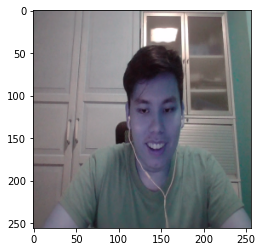

In [29]:
resized.shape
plt.imshow(np.load(os.path.join(DATA_PATH, action, str(sequence), str(1) + ".npy")))

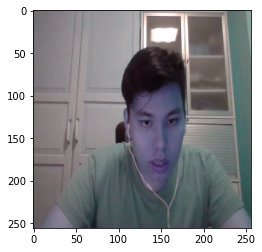

In [30]:

plt.imshow(np.load(os.path.join(DATA_PATH, action, str(46), str(29) + ".npy")))

## Preprocess data

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape

(120, 30, 1662)

In [13]:
np.array(labels).shape

(120,)

In [14]:
X = np.array(sequences)

In [15]:
X.shape

(120, 30, 1662)

In [16]:
y = to_categorical(labels).astype(int)

In [17]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
y_test.shape

(12, 4)

## CNN-LSTM

## For using SgSL videos

In [64]:
filename = "gif_father_signer4_v1.gif"
vid_path = os.path.join("SgSL", filename)

sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(vid_path)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            

    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

30

<VideoCapture 000001FA021DD030>